<a href="https://colab.research.google.com/github/iishipatel/customNER-forHomeAutomation/blob/main/prism_ner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U spacy

     |████████████████████████████████| 12.8MB 335kB/s 
     |████████████████████████████████| 1.1MB 41.2MB/s 
     |████████████████████████████████| 460kB 41.5MB/s 
     |████████████████████████████████| 9.1MB 27.6MB/s 
     |████████████████████████████████| 122kB 50.2MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=f2e42e1c8800a320cb0d187ef7ed23e6e22c46089ec70388a5326f07aa129288
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: smart-open 4.2.0
    Uninstalling smart-open-4.2.0:
      Successfully uninstalled smart-open-4.2.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    U

In [ ]:
!python -m spacy download en

2021-03-17 06:05:54.422742: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.7MB 304kB/s 
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import json
import logging
import sys

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
path="/content/gdrive/MyDrive/Samsung-Prism/ner-dataset.csv"

In [ ]:
def tsv_to_json_format(input_path,output_path,unknown_label):
    try:
        f=open(input_path,'r') # input file
        fp=open(output_path, 'w') # output file
        data_dict={}
        annotations =[]
        label_dict={}
        s=''
        start=0
        for line in f:
            if line[0:len(line)-1]!='.	0':
                word,entity=line.split('\t')
                s+=word+" "
                entity=entity[:len(entity)-1]
                if entity!=unknown_label:
                    if len(entity) != 1:
                        d={}
                        d['text']=word
                        d['start']=start
                        d['end']=start+len(word)-1  
                        try:
                            label_dict[entity].append(d)
                        except:
                            label_dict[entity]=[]
                            label_dict[entity].append(d) 
                start+=len(word)+1
            else:
                data_dict['content']=s
                s=''
                label_list=[]
                for ents in list(label_dict.keys()):
                    for i in range(len(label_dict[ents])):
                        if(label_dict[ents][i]['text']!=''):
                            l=[ents,label_dict[ents][i]]
                            for j in range(i+1,len(label_dict[ents])): 
                                if(label_dict[ents][i]['text']==label_dict[ents][j]['text']):  
                                    di={}
                                    di['start']=label_dict[ents][j]['start']
                                    di['end']=label_dict[ents][j]['end']
                                    di['text']=label_dict[ents][i]['text']
                                    l.append(di)
                                    label_dict[ents][j]['text']=''
                            label_list.append(l)                         
                            
                for entities in label_list:
                    label={}
                    label['label']=[entities[0]]
                    label['points']=entities[1:]
                    annotations.append(label)
                data_dict['annotation']=annotations
                annotations=[]
                json.dump(data_dict, fp)
                fp.write('\n')
                data_dict={}
                start=0
                label_dict={}
    except Exception as e:
        logging.exception("Unable to process file" + "\n" + "error = " + str(e))
        return None

In [ ]:
tsv_to_json_format("/content/gdrive/MyDrive/Samsung-Prism/ner-dataset.tsv",'/content/gdrive/MyDrive/Samsung-Prism/ner_dataset.json','abc')

turn	B-action
on	B-state
AC	B-device
in	0
the	0
bedroom	B-room
.	0
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}]]
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}], ['B-state', {'text': 'on', 'start': 5, 'end': 6}]]
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}], ['B-state', {'text': 'on', 'start': 5, 'end': 6}], ['B-device', {'text': 'AC', 'start': 8, 'end': 9}]]
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}], ['B-state', {'text': 'on', 'start': 5, 'end': 6}], ['B-device', {'text': 'AC', 'start': 8, 'end': 9}], ['B-room', {'text': 'bedroom', 'start': 18, 'end': 24}]]
turn	B-action
off	B-state
UPS	B-device
in	0
the	0
livingroom	B-room
.	0
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}]]
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}], ['B-state', {'text': 'off', 'start': 5, 'end': 7}]]
[['B-action', {'text': 'turn', 'start': 0, 'end': 3}], ['B-state', {'text': 'off', 'start': 5, 'end': 7}], ['B-device', {'text': 'UPS', 'start': 9, 'end': 11}]]
[['B

In [32]:
import plac
import logging
import argparse
import sys
import os

import pickle

In [35]:
from __future__ import unicode_literals, print_function
import plac
import random
from pathlib import Path
import spacy
from tqdm import tqdm
import json

In [3]:
TRAIN_DATA=[('turn on AC in the bedroom', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 10, 'B-device'), (18, 25, 'B-room')]}), ('turn off UPS in the livingroom', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 12, 'B-device'), (20, 30, 'B-room')]}), ('turn on Light in the storeroom', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 13, 'B-device'), (21, 30, 'B-room')]}), ('turn on Fan in the bedroom', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 11, 'B-device'), (19, 26, 'B-room')]}), ('turn off Refrigerator in the kitchen', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 21, 'B-device'), (29, 36, 'B-room')]}), ('turn on Fan in the livingroom', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 11, 'B-device'), (19, 29, 'B-room')]}), ('turn off Fan in the bedroom', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 12, 'B-device'), (20, 27, 'B-room')]}), ('turn on Light in the kitchen', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 13, 'B-device'), (21, 28, 'B-room')]}), ('turn off Speaker in the bedroom', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 16, 'B-device'), (24, 31, 'B-room')]}), ('turn on Microwave in the kitchen', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 17, 'B-device'), (25, 32, 'B-room')]}), ('turn on Computer in the studyroom', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 16, 'B-device'), (24, 33, 'B-room')]}), ('turn on Nightlamp in the bedroom', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 17, 'B-device'), (25, 32, 'B-room')]}), ('turn on Television in the livingroom', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 18, 'B-device'), (26, 36, 'B-room')]}), ('switch off the TV in guestroom', {'entities': [(0, 6, 'B-action'), (7, 10, 'B-state'), (15, 17, 'B-device'), (21, 30, 'B-room')]}), ('turn on Refrigerator in the kitchen', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 20, 'B-device'), (28, 35, 'B-room')]}), ('turn off Fan in the livingroom', {'entities': [(0, 4, 'B-action'), (5, 8, 'B-state'), (9, 12, 'B-device'), (20, 30, 'B-room')]}), ('turn on Fan in the bedroom', {'entities': [(0, 4, 'B-action'), (5, 7, 'B-state'), (8, 11, 'B-device'), (19, 26, 'B-room')]}), ('turn on Grinder in the kitchen decrease room temprature it feels like summer', {'entities': [(0, 4, 'B-action'), (31, 39, 'B-action'), (5, 7, 'B-state'), (8, 15, 'B-device'), (23, 30, 'B-room'), (40, 55, 'B-attribute')]}), ('hey can you start the televison', {'entities': [(12, 17, 'B-action'), (22, 31, 'B-device')]}), ('I am going to visit Durgapur in India', {'entities': [(5, 10, 'B-action'), (14, 19, 'B-action'), (20, 28, 'B-geo'), (32, 37, 'B-geo')]}), ('reduce the noise its hurting my ears', {'entities': [(0, 6, 'B-action'), (21, 28, 'B-action'), (11, 16, 'B-attribute')]}), ('heat the oven to 20 degrees', {'entities': [(0, 4, 'B-action'), (9, 13, 'B-device'), (17, 27, 'B-state')]})]

In [4]:
model = None
output_dir=Path("/content/gdrive/MyDrive/Samsung-Prism/")
n_iter=75

In [5]:
#load the model

if model is not None:
    nlp = spacy.load(model)  
    print("Loaded model '%s'" % model)
else:
    nlp = spacy.blank('en')  
    print("Created blank 'en' model")

#set up the pipeline

if 'ner' not in nlp.pipe_names:
    ner = nlp.create_pipe('ner')
    nlp.add_pipe(ner, last=True)
else:
    ner = nlp.get_pipe('ner')

Created blank 'en' model


In [6]:
import re
def trim_entity_spans(data: list) -> list:
    """Removes leading and trailing white spaces from entity spans.

    Args:
        data (list): The data to be cleaned in spaCy JSON format.

    Returns:
        list: The cleaned data.
    """
    invalid_span_tokens = re.compile(r'\s')

    cleaned_data = []
    for text, annotations in data:
        entities = annotations['entities']
        valid_entities = []
        for start, end, label in entities:
            valid_start = start
            valid_end = end
            while valid_start < len(text) and invalid_span_tokens.match(
                    text[valid_start]):
                valid_start += 1
            while valid_end > 1 and invalid_span_tokens.match(
                    text[valid_end - 1]):
                valid_end -= 1
            valid_entities.append([valid_start, valid_end, label])
        cleaned_data.append([text, {'entities': valid_entities}])

    return cleaned_data

newdata=trim_entity_spans(TRAIN_DATA)

In [7]:
for _, annotations in newdata:
    for ent in annotations.get('entities'):
        ner.add_label(ent[2])
loss_log=[]
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
with nlp.disable_pipes(*other_pipes):  # only train NER
    optimizer = nlp.begin_training()
    for itn in range(n_iter):
        random.shuffle(newdata)
        losses = {}
        for text, annotations in tqdm(newdata):
            nlp.update(
                [text],  
                [annotations],  
                drop=0.5,  
                sgd=optimizer,
                losses=losses)
        loss_log.append(losses['ner'])
        print(losses)

 18%|█▊        | 4/22 [00:00<00:00, 34.59it/s]

{'ner': 122.16545987129211}


 18%|█▊        | 4/22 [00:00<00:00, 34.80it/s]

{'ner': 100.15831698477268}


 18%|█▊        | 4/22 [00:00<00:00, 33.22it/s]

{'ner': 72.44314971938729}


 18%|█▊        | 4/22 [00:00<00:00, 35.93it/s]

{'ner': 35.621518945728496}


 18%|█▊        | 4/22 [00:00<00:00, 36.49it/s]

{'ner': 25.624798626102567}


 18%|█▊        | 4/22 [00:00<00:00, 35.36it/s]

{'ner': 22.213301726623662}


 18%|█▊        | 4/22 [00:00<00:00, 33.51it/s]

{'ner': 19.400016517145737}


 18%|█▊        | 4/22 [00:00<00:00, 35.45it/s]

{'ner': 19.428328335909484}


 18%|█▊        | 4/22 [00:00<00:00, 33.43it/s]

{'ner': 20.255875916467556}


 18%|█▊        | 4/22 [00:00<00:00, 33.72it/s]

{'ner': 13.955845383600206}


 18%|█▊        | 4/22 [00:00<00:00, 36.49it/s]

{'ner': 8.816305502686554}


 18%|█▊        | 4/22 [00:00<00:00, 35.81it/s]

{'ner': 8.401098349624677}


 18%|█▊        | 4/22 [00:00<00:00, 32.09it/s]

{'ner': 10.975921765243738}


 18%|█▊        | 4/22 [00:00<00:00, 35.48it/s]

{'ner': 13.168221619869762}


 18%|█▊        | 4/22 [00:00<00:00, 37.08it/s]

{'ner': 13.373424618275727}


 18%|█▊        | 4/22 [00:00<00:00, 33.89it/s]

{'ner': 9.102180219028384}


 18%|█▊        | 4/22 [00:00<00:00, 33.79it/s]

{'ner': 6.517009101854818}


 18%|█▊        | 4/22 [00:00<00:00, 34.78it/s]

{'ner': 6.6483687612951154}


 18%|█▊        | 4/22 [00:00<00:00, 35.29it/s]

{'ner': 8.52063625291193}


 18%|█▊        | 4/22 [00:00<00:00, 34.19it/s]

{'ner': 9.492394633263435}


 18%|█▊        | 4/22 [00:00<00:00, 35.42it/s]

{'ner': 6.220299095011238}


 18%|█▊        | 4/22 [00:00<00:00, 31.03it/s]

{'ner': 5.825452093842288}


 18%|█▊        | 4/22 [00:00<00:00, 32.44it/s]

{'ner': 5.887344210837604}


 18%|█▊        | 4/22 [00:00<00:00, 32.21it/s]

{'ner': 7.561218802665347}


 14%|█▎        | 3/22 [00:00<00:00, 28.15it/s]

{'ner': 5.2119090470002725}


 14%|█▎        | 3/22 [00:00<00:00, 28.93it/s]

{'ner': 2.5108272828261735}


 14%|█▎        | 3/22 [00:00<00:00, 28.82it/s]

{'ner': 2.927580120516809}


 14%|█▎        | 3/22 [00:00<00:00, 25.24it/s]

{'ner': 2.2649048500131777}


 14%|█▎        | 3/22 [00:00<00:00, 27.12it/s]

{'ner': 2.3784901112879147}


 14%|█▎        | 3/22 [00:00<00:00, 25.91it/s]

{'ner': 0.7811522272756996}


 14%|█▎        | 3/22 [00:00<00:00, 23.08it/s]

{'ner': 5.099703356331799}


 14%|█▎        | 3/22 [00:00<00:00, 25.50it/s]

{'ner': 2.343317760341013}


 14%|█▎        | 3/22 [00:00<00:00, 24.53it/s]

{'ner': 1.8412940597492593}


 14%|█▎        | 3/22 [00:00<00:00, 22.75it/s]

{'ner': 0.04228576657364011}


 14%|█▎        | 3/22 [00:00<00:00, 24.92it/s]

{'ner': 1.3992606644107994}


 14%|█▎        | 3/22 [00:00<00:00, 22.72it/s]

{'ner': 0.05483402774321553}


 14%|█▎        | 3/22 [00:00<00:00, 24.09it/s]

{'ner': 2.619544504248929}


 14%|█▎        | 3/22 [00:00<00:00, 24.51it/s]

{'ner': 3.1425963668111176}


 14%|█▎        | 3/22 [00:00<00:00, 24.40it/s]

{'ner': 0.3208237866942857}


 14%|█▎        | 3/22 [00:00<00:00, 24.92it/s]

{'ner': 0.007505167110740617}


 14%|█▎        | 3/22 [00:00<00:00, 25.03it/s]

{'ner': 0.293557635716911}


 14%|█▎        | 3/22 [00:00<00:00, 24.62it/s]

{'ner': 0.0060751973225281935}


 14%|█▎        | 3/22 [00:00<00:00, 27.17it/s]

{'ner': 2.1372301587359614}


 14%|█▎        | 3/22 [00:00<00:00, 26.78it/s]

{'ner': 2.943114823898033}


 14%|█▎        | 3/22 [00:00<00:00, 26.29it/s]

{'ner': 1.1537688517509856}


 14%|█▎        | 3/22 [00:00<00:00, 27.73it/s]

{'ner': 3.843575134013244}


 14%|█▎        | 3/22 [00:00<00:00, 28.33it/s]

{'ner': 2.0193904755857175}


 18%|█▊        | 4/22 [00:00<00:00, 31.45it/s]

{'ner': 0.8567898471984152}


 18%|█▊        | 4/22 [00:00<00:00, 31.33it/s]

{'ner': 2.2015600949093765}


 18%|█▊        | 4/22 [00:00<00:00, 31.78it/s]

{'ner': 1.8406749941580112}


 18%|█▊        | 4/22 [00:00<00:00, 32.33it/s]

{'ner': 0.10678223078900642}


 18%|█▊        | 4/22 [00:00<00:00, 34.68it/s]

{'ner': 5.1740296760978115}


 18%|█▊        | 4/22 [00:00<00:00, 31.53it/s]

{'ner': 0.1189826428109538}


 18%|█▊        | 4/22 [00:00<00:00, 32.55it/s]

{'ner': 0.008811997298714562}


 18%|█▊        | 4/22 [00:00<00:00, 34.08it/s]

{'ner': 0.001011861326212733}


 18%|█▊        | 4/22 [00:00<00:00, 33.05it/s]

{'ner': 0.0002119752124007913}


 18%|█▊        | 4/22 [00:00<00:00, 35.90it/s]

{'ner': 0.13617289971347668}


 18%|█▊        | 4/22 [00:00<00:00, 35.59it/s]

{'ner': 8.361711562660102e-06}


 18%|█▊        | 4/22 [00:00<00:00, 34.42it/s]

{'ner': 0.0727935464066107}


 18%|█▊        | 4/22 [00:00<00:00, 31.53it/s]

{'ner': 0.10585606400272522}


 18%|█▊        | 4/22 [00:00<00:00, 33.37it/s]

{'ner': 4.457329129058327e-06}


 14%|█▎        | 3/22 [00:00<00:00, 29.63it/s]

{'ner': 0.0033512663647091677}


 14%|█▎        | 3/22 [00:00<00:00, 27.46it/s]

{'ner': 0.004001107041460342}


 14%|█▎        | 3/22 [00:00<00:00, 25.67it/s]

{'ner': 0.0006565314201882797}


 14%|█▎        | 3/22 [00:00<00:00, 23.20it/s]

{'ner': 6.16921023748565e-06}


  9%|▉         | 2/22 [00:00<00:01, 19.95it/s]

{'ner': 2.528778389227302}


  9%|▉         | 2/22 [00:00<00:01, 18.38it/s]

{'ner': 1.4721358490146361}


  9%|▉         | 2/22 [00:00<00:01, 17.59it/s]

{'ner': 0.0013875668623557606}


  9%|▉         | 2/22 [00:00<00:01, 16.51it/s]

{'ner': 0.0005282461420566545}


  9%|▉         | 2/22 [00:00<00:01, 16.76it/s]

{'ner': 0.0006283274444757998}


  9%|▉         | 2/22 [00:00<00:01, 16.86it/s]

{'ner': 0.00015036324504674208}


  9%|▉         | 2/22 [00:00<00:01, 16.44it/s]

{'ner': 0.08280293195812177}


  9%|▉         | 2/22 [00:00<00:01, 15.63it/s]

{'ner': 4.814583918612262}


  9%|▉         | 2/22 [00:00<00:01, 17.03it/s]

{'ner': 0.010200220734936372}


100%|██████████| 22/22 [00:01<00:00, 16.04it/s]

{'ner': 0.02029394277361019}


In [8]:
import matplotlib.pyplot as plt

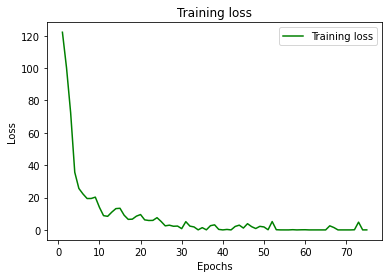

In [9]:
loss_train = loss_log
epochs=range(1,76)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
# Test the trained model
test_text = 'switch on the light in the bedroom'
doc = nlp(test_text)
print("Entities in '%s'" % test_text)
results={}
for ent in doc.ents:
    results[ent.label_]=ent.text
    print(ent.label_, ent.text)
print(results)

Entities in 'switch on the light in the bedroom'
B-action switch
B-state on
B-device light
B-room bedroom
{'B-action': 'switch', 'B-state': 'on', 'B-device': 'light', 'B-room': 'bedroom'}


In [12]:
if output_dir is not None:
    output_dir = Path(output_dir)
    if not output_dir.exists():
        output_dir.mkdir()
    nlp.to_disk(output_dir)
    print("Saved model to", output_dir)

Saved model to /content/gdrive/MyDrive/Samsung-Prism


In [16]:
nlp1 = spacy.blank('en').from_disk('/content/gdrive/MyDrive/Samsung-Prism')
test_text = 'switch off the tv in livingroom'
doc = nlp1(test_text)
print("Entities in '%s'" % test_text)
results={}
for ent in doc.ents:
    results[ent.label_]=ent.text
    print(ent.label_, ent.text)
print(results)

Entities in 'switch off the tv in livingroom'
{}


In [34]:
result={}
result["action"]=results['B-action']
result["state"]=results['B-state']
result["room"]=results['B-room']
result["device"]=results['B-device']
print (result)
json_object = json.dumps(result, indent = 4)
print (json_object)

{'action': 'switch', 'state': 'on', 'room': 'bedroom', 'device': 'light'}
{
    "action": "switch",
    "state": "on",
    "room": "bedroom",
    "device": "light"
}


In [37]:
headers={
    'Content-Type': 'application/json'
}

In [39]:
import requests
url='http://spring-boot-samsung-prism.herokuapp.com/query'
response=requests.post(url,json_object,headers=headers)
print(response.text)

[{"id":433,"name":"switch","state":"on","device":{"id":431,"label":"light","type":"type","model":"model","brandName":"brandName","room":{"id":392,"label":"bedroom","location":null}}},{"id":823,"name":"switch","state":"on","device":{"id":821,"label":"light","type":"type","model":"model","brandName":"brandName","room":{"id":782,"label":"bedroom","location":null}}},{"id":1213,"name":"switch","state":"on","device":{"id":1211,"label":"light","type":"type","model":"model","brandName":"brandName","room":{"id":1172,"label":"bedroom","location":null}}}]
